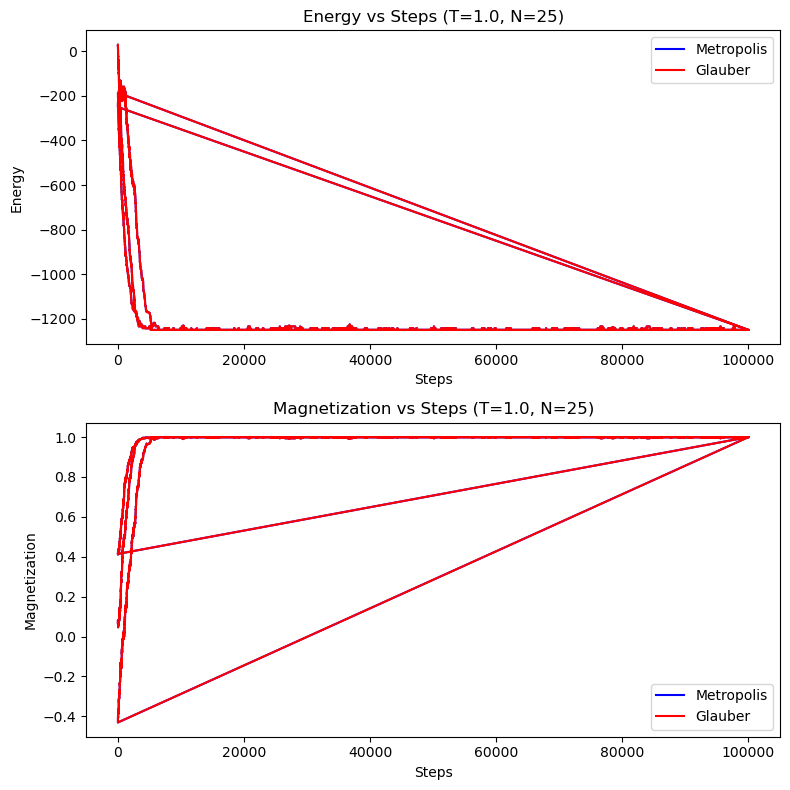

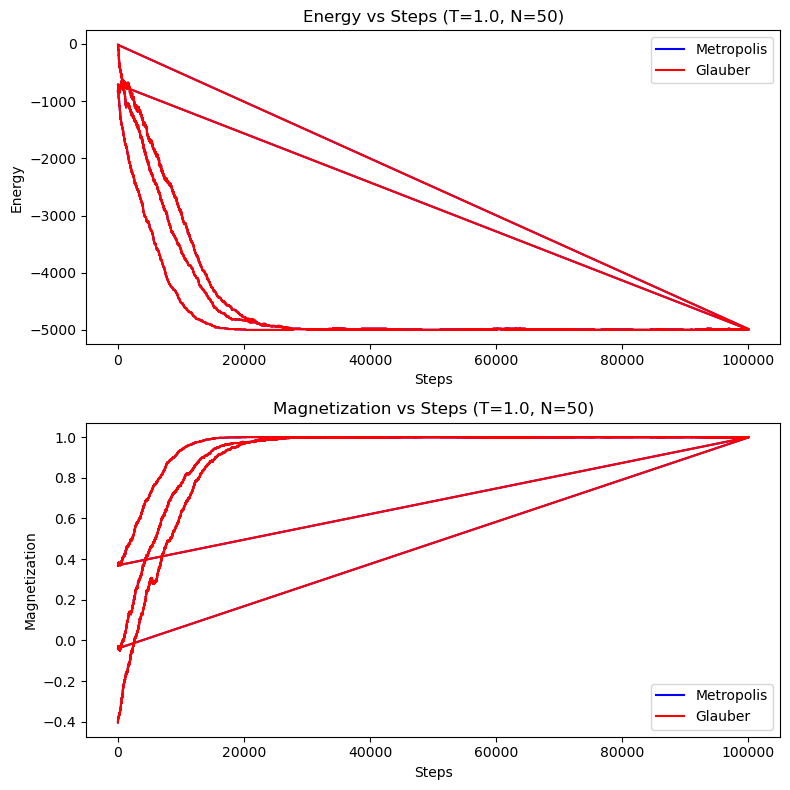

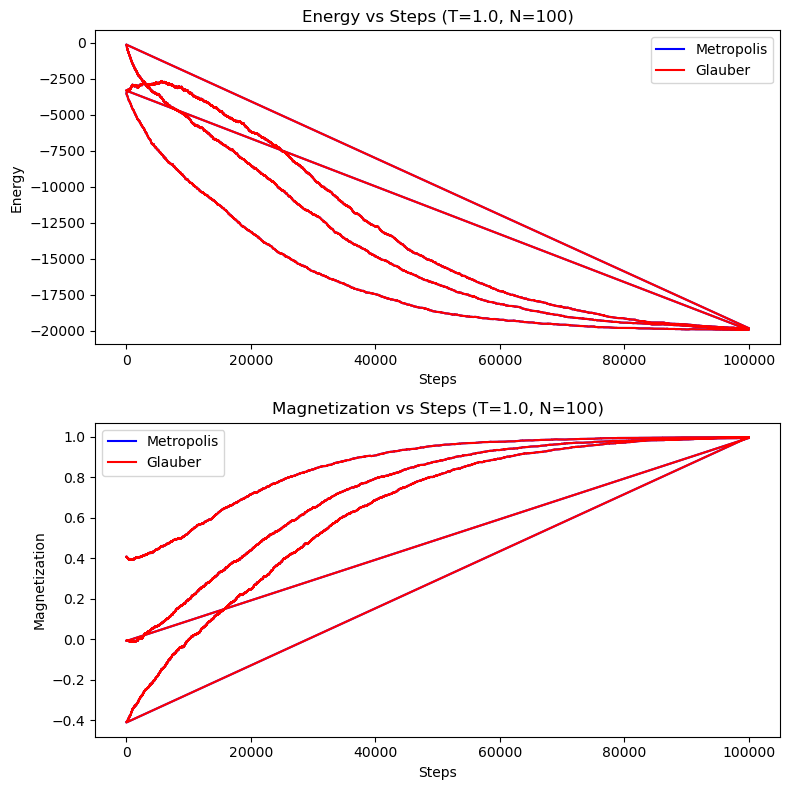

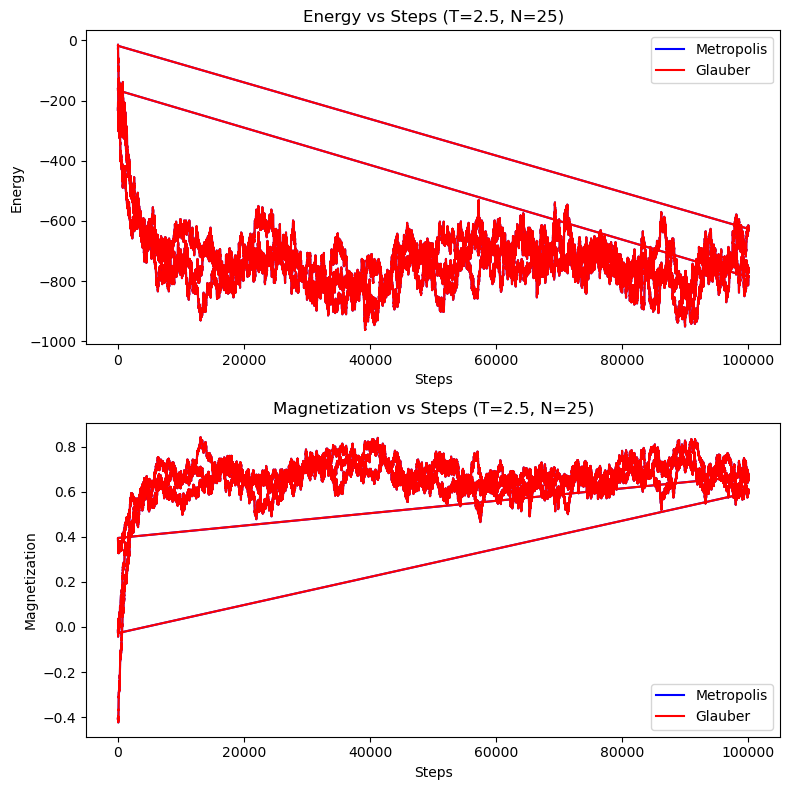

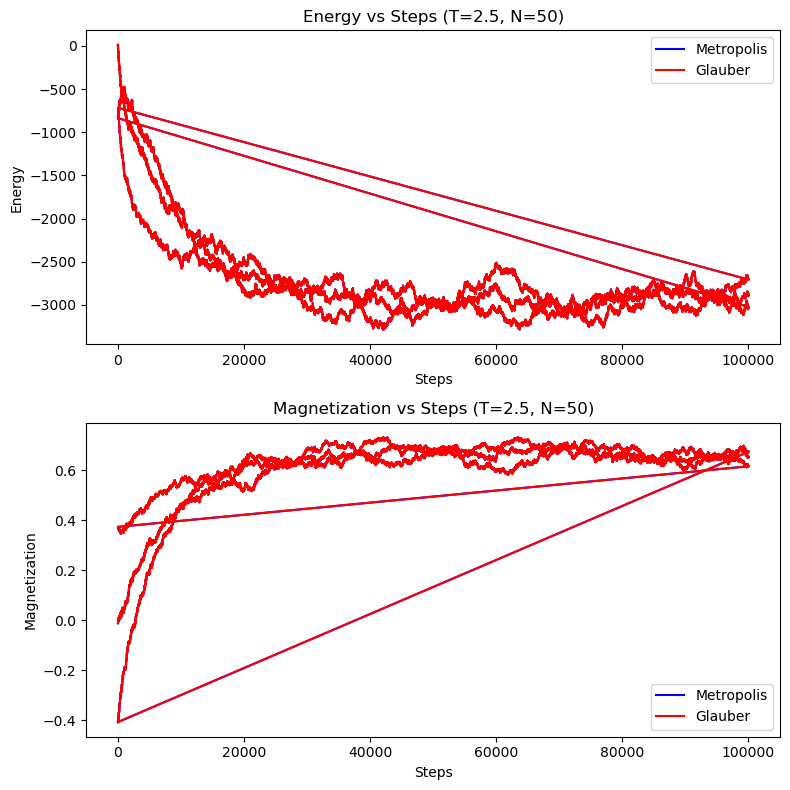

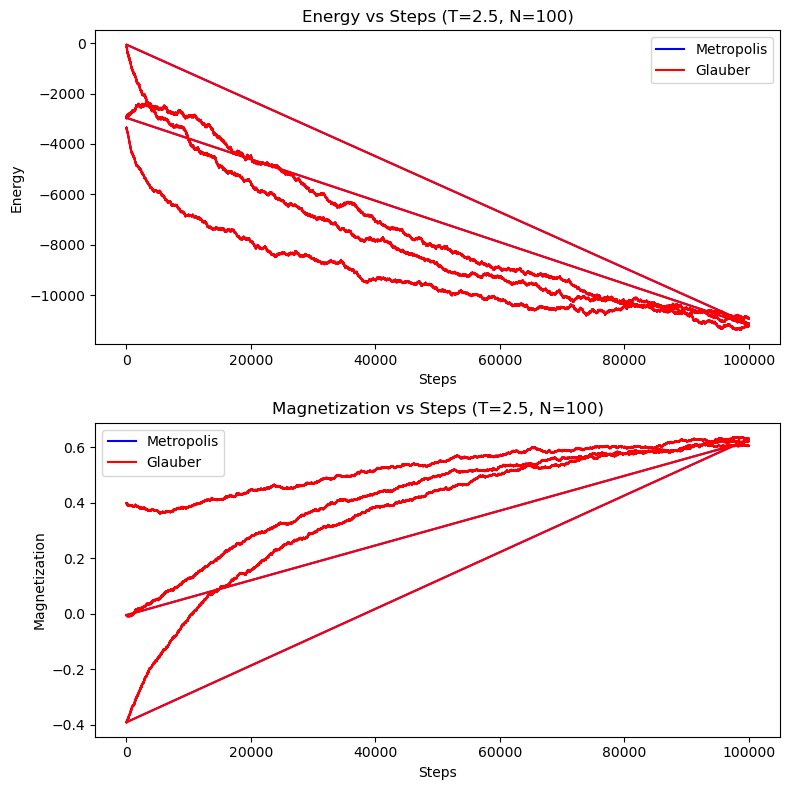

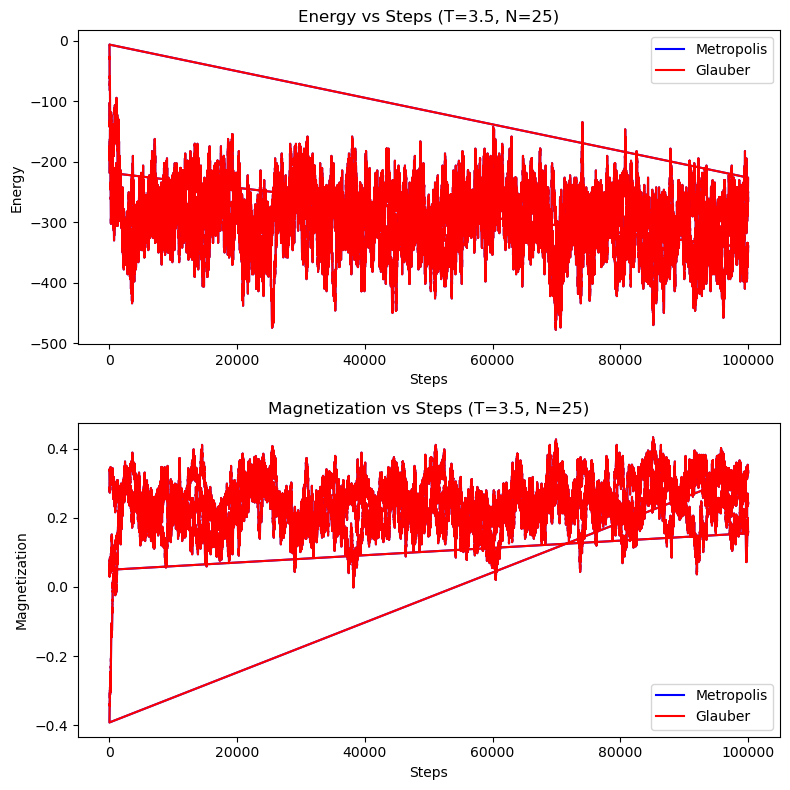

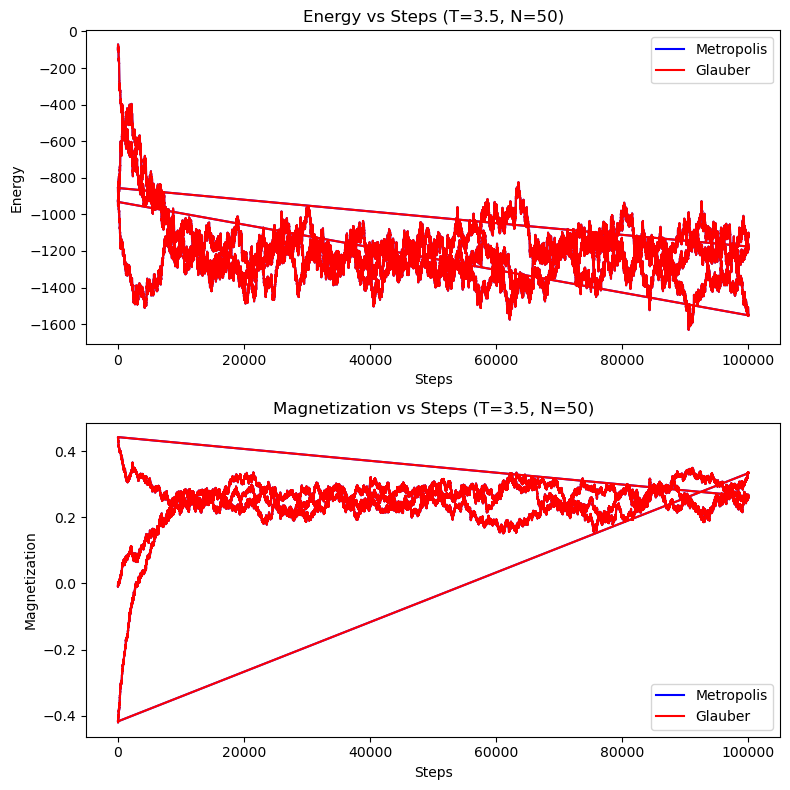

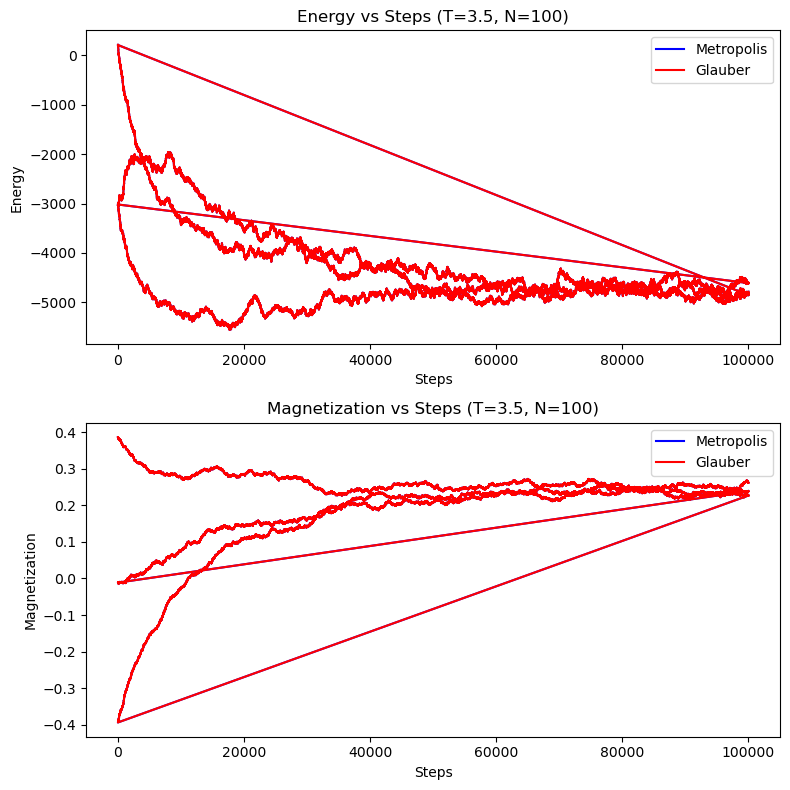

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

# Funzione per ordinare i file in base alla temperatura e alla dimensione del lattice
def sort_files(file_pattern):
    files = glob.glob(file_pattern)
    
    def sort_key(filename):
        match = re.search(r'T(\d+(\.\d+)?)_N(\d+)', filename)
        if match:
            temp = float(match.group(1))
            size = int(match.group(3))
            return (temp, size)
        return (0, 0)  # Valore di default nel caso in cui il pattern non corrisponda
    
    files.sort(key=sort_key)
    return files

# Funzione per leggere i dati dai file
def read_data(files):
    data = {}
    
    for file in files:
        # Estrazione di temperatura e dimensione dal nome del file
        match = re.search(r'T(\d+(\.\d+)?)_N(\d+)', file)
        if match:
            temp = float(match.group(1))
            size = int(match.group(3))
            key = f'T{temp}_N{size}'
            
            if key not in data:
                data[key] = {'steps': [], 'energies': [], 'magnetizations': []}
            
            with open(file, 'r') as f:
                for line in f:
                    parts = line.split()
                    method, step, energy, magnetization = parts[0], int(parts[1]), float(parts[2]), float(parts[3])
                    data[key]['steps'].append(step)
                    data[key]['energies'].append(energy)
                    data[key]['magnetizations'].append(magnetization)
    
    return data

# Funzione per visualizzare i dati
def plot_data(data):
    for key in data:
        temp, size = key.split('_')
        temp = temp[1:]
        size = size[1:]
        
        plt.figure(figsize=(8, 8))
        
        plt.subplot(2, 1, 1)
        plt.plot(data[key]['steps'], data[key]['energies'], label='Metropolis', color='b')
        plt.plot(data[key]['steps'], data[key]['energies'], label='Glauber', color='r')
        plt.title(f'Energy vs Steps (T={temp}, N={size})')
        plt.xlabel('Steps')
        plt.ylabel('Energy')
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.plot(data[key]['steps'], data[key]['magnetizations'], label='Metropolis', color='b')
        plt.plot(data[key]['steps'], data[key]['magnetizations'], label='Glauber', color='r')
        plt.title(f'Magnetization vs Steps (T={temp}, N={size})')
        plt.xlabel('Steps')
        plt.ylabel('Magnetization')
        #plt.ylim(0.8,1.1)
        #plt.xlim(0,7000)
        
        #plt.axhline(y=1.0, color='g', linestyle='--', label='Magnetization = 1')
        #plt.axvline(x=6211, color='m', linestyle='-.', label=f'Equilibrium Step = 6211')
        
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Main script
sorted_files = sort_files('dati_file_txt/ising_data_T*.txt')
data = read_data(sorted_files)

plot_data(data)


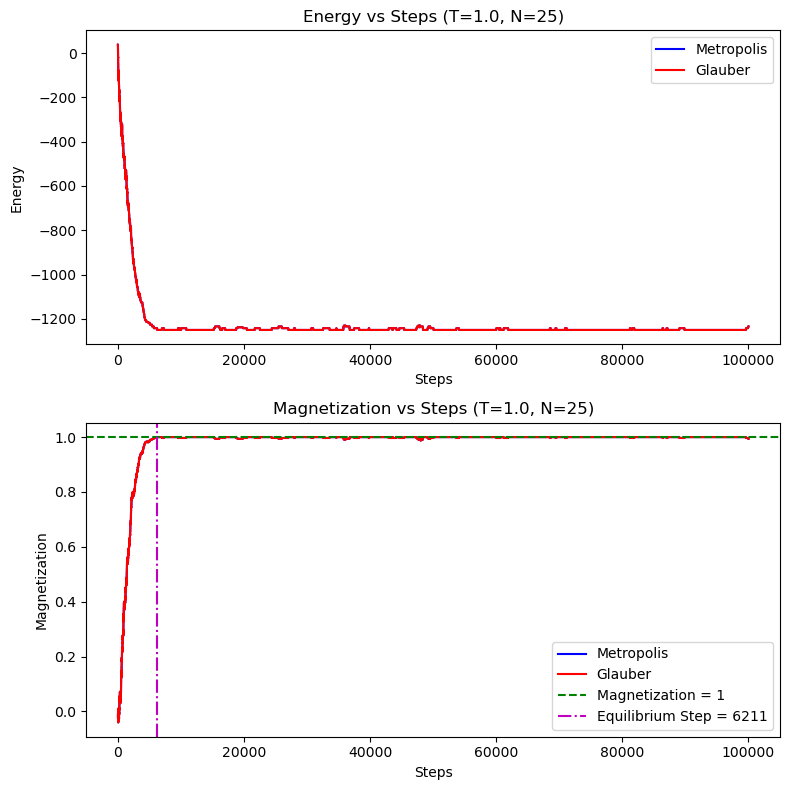

NameError: name 'results' is not defined

In [44]:
# Estrazione dei dati per T=1 e N=25
selected_key = 'T1.0_N25'

if selected_key in data:
    # Creazione di un nuovo dizionario con solo i dati selezionati
    selected_data = {selected_key: data[selected_key]}
    
    # Chiamata alla funzione plot_data con i dati selezionati
    plot_data(selected_data)
    magnetization_stats = calculate_average_magnetization(selected_data, 6211) 
    
    # Estrazione dei risultati per T=1.0 e N=25
    average_magnetization = magnetization_stats[selected_key]['average_magnetization']
    variance_magnetization = magnetization_stats[selected_key]['variance_magnetization']
    
    # Stampa dei risultati
    print(f'Results for T=1.0 and N=25:')
    print(f'Average magnetization after step 6211: {average_magnetization}')
    print(f'Variance of magnetization after step 6211: {variance_magnetization}')

else:
    print(f'Data for T=1.0 and N=25 not found.')


In [9]:
def find_step_for_magnetization(data, target_magnetization=1.0):
    results = {}
    
    for key in data:
        steps = data[key]['steps']
        magnetizations = data[key]['magnetizations']
        
        for step, magnetization in zip(steps, magnetizations):
            if magnetization >= target_magnetization:
                results[key] = step
                break  # Interrompe la ricerca per questa combinazione non appena viene raggiunta la magnetizzazione di 1
    
    return results

# Main script
sorted_files = sort_files('dati_file_txt/ising_data_T*.txt')
data = read_data(sorted_files)

# Trova il passo in cui la magnetizzazione raggiunge 1 per ogni combinazione di T e N
steps_to_magnetization_1 = find_step_for_magnetization(data)

# Stampa i risultati
for key, step in steps_to_magnetization_1.items():
    print(f'{key}: Magnetization reached 1 at step {step}')

T1.0_N25: Magnetization reached 1 at step 6211
T1.0_N50: Magnetization reached 1 at step 40501


In [43]:
def calculate_average_magnetization(data, equilibrium_step):
    averages = {}
    
    for key in data:
        steps = np.array(data[key]['steps'])
        magnetizations = np.array(data[key]['magnetizations'])
        
        # Seleziona solo i dati dopo il tempo di equilibrio
        indices = steps >= equilibrium_step
        equilibrium_magnetizations = magnetizations[indices]
        
        # Calcola la media e la varianza della magnetizzazione dopo il tempo di equilibrio
        average_magnetization = np.mean(equilibrium_magnetizations)
        variance_magnetization = np.var(equilibrium_magnetizations)
        
        # Salva i risultati in un dizionario
        results[key] = {
            'average_magnetization': average_magnetization,
            'variance_magnetization': variance_magnetization
        }
    
    return results

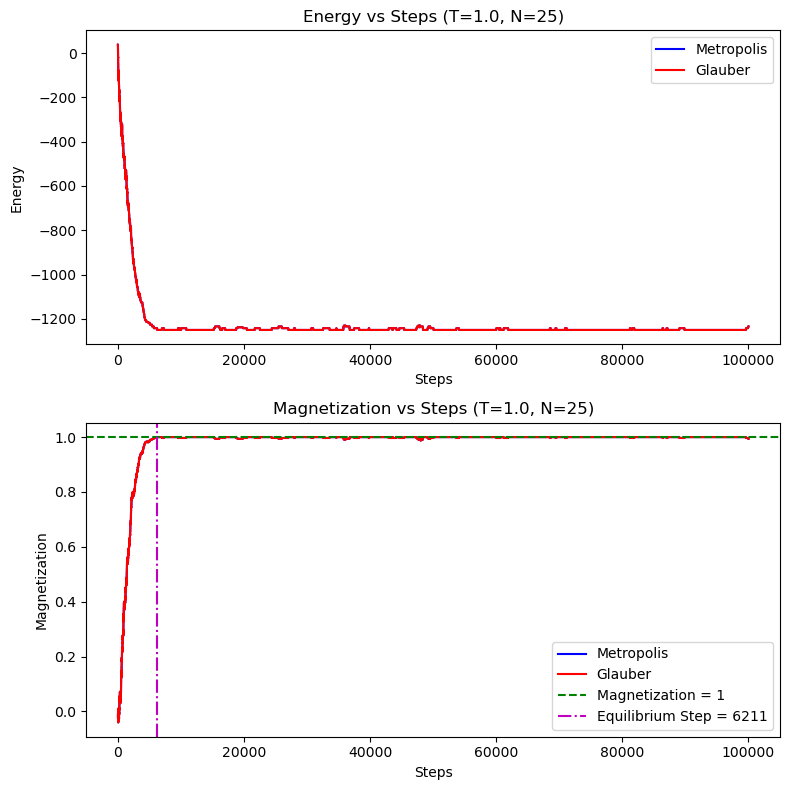

Results for T=1.0 and N=25:
Average magnetization after step 6211: 0.999159730885285
Variance of magnetization after step 6211: 3.289926874234104e-06


In [45]:
average_magnetizations = calculate_average_magnetization(data, equilibrium_step)

# Stampa la magnetizzazione media per ogni combinazione T e N
for key, avg_mag in average_magnetizations.items():
    print(f'{key}: Average magnetization after step {equilibrium_step} = {avg_mag}')

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

# Funzione per ordinare i file in base alla temperatura e alla dimensione del lattice
def sort_files(file_pattern):
    files = glob.glob(file_pattern)
    
    def sort_key(filename):
        match = re.search(r'T(\d+(\.\d+)?)_N(\d+)', filename)
        if match:
            temp = float(match.group(1))
            size = int(match.group(3))
            return (temp, size)
        return (0, 0)  # Valore di default nel caso in cui il pattern non corrisponda
    
    files.sort(key=sort_key)
    return files

# Funzione per leggere i dati dai file
def read_data(files):
    data = {}
    
    for file in files:
        # Estrazione di temperatura e dimensione dal nome del file
        match = re.search(r'T(\d+(\.\d+)?)_N(\d+)', file)
        if match:
            temp = float(match.group(1))
            size = int(match.group(3))
            key = f'T{temp}_N{size}'
            
            if key not in data:
                data[key] = {'steps': [], 'energies': [], 'magnetizations': []}
            
            with open(file, 'r') as f:
                for line in f:
                    parts = line.split()
                    method, step, energy, magnetization = parts[0], int(parts[1]), float(parts[2]), float(parts[3])
                    data[key]['steps'].append(step)
                    data[key]['energies'].append(energy)
                    data[key]['magnetizations'].append(magnetization)
    
    return data

# Funzione per visualizzare i dati
def plot_data(data, selected_key):
    if selected_key not in data:
        print(f"No data for {selected_key}")
        return
    
    # Filtra i dati per T=1 e N=25
    temp, size = selected_key.split('_')
    temp = temp[1:]
    size = size[1:]
    
    plt.figure(figsize=(12, 10))
    
    # Dati normali
    if f'T{temp}_N{size}' in data:
        plt.subplot(2, 1, 1)
        plt.plot(data[f'T{temp}_N{size}']['steps'], data[f'T{temp}_N{size}']['energies'], label='Metropolis Normal', color='b')
        plt.plot(data[f'T{temp}_N{size}']['steps'], data[f'T{temp}_N{size}']['energies'], label='Glauber Normal', color='r')
        plt.title(f'Energy vs Steps (T={temp}, N={size})')
        plt.xlabel('Steps')
        plt.ylabel('Energy')
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.plot(data[f'T{temp}_N{size}']['steps'], data[f'T{temp}_N{size}']['magnetizations'], label='Metropolis Normal', color='b')
        plt.plot(data[f'T{temp}_N{size}']['steps'], data[f'T{temp}_N{size}']['magnetizations'], label='Glauber Normal', color='r')
        plt.title(f'Magnetization vs Steps (T={temp}, N={size})')
        plt.xlabel('Steps')
        plt.ylabel('Magnetization')
        
        plt.axhline(y=1.0, color='g', linestyle='--', label='Magnetization = 1')
        plt.axvline(x=6211, color='m', linestyle='-.', label='Equilibrium Step = 6211')
        plt.legend()
    
    # Dati "positive"
    positive_key = f'T{temp}_N{size}_positive'
    if positive_key in data:
        plt.subplot(2, 1, 1)
        plt.plot(data[positive_key]['steps'], data[positive_key]['energies'], label='Metropolis Positive', color='c', linestyle='--')
        plt.plot(data[positive_key]['steps'], data[positive_key]['energies'], label='Glauber Positive', color='m', linestyle='--')
        
        plt.subplot(2, 1, 2)
        plt.plot(data[positive_key]['steps'], data[positive_key]['magnetizations'], label='Metropolis Positive', color='c', linestyle='--')
        plt.plot(data[positive_key]['steps'], data[positive_key]['magnetizations'], label='Glauber Positive', color='m', linestyle='--')
    
    plt.tight_layout()
    plt.show()

# Main script
sorted_files = sort_files('dati_file_txt/ising_data_T*.txt')
data = read_data(sorted_files)

# Specifica la combinazione di temperatura e dimensione
selected_key = 'T1.0_N25'

plot_data(data, selected_key)


TypeError: unhashable type: 'slice'

In [54]:
# Stampa delle chiavi e dei primi elementi dei valori nel dizionario
for key, value in data.items():
    print(f'Key: {key}')
    

Key: T1.0_N25
Key: T1.0_N50
Key: T1.0_N100
Key: T2.5_N25
Key: T2.5_N50
Key: T2.5_N100
Key: T3.5_N25
Key: T3.5_N50
Key: T3.5_N100
